In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [6]:
cyclists_df = pd.read_csv('../dataset/cyclists_clustering.csv')
races_df = pd.read_csv('../dataset/races_clustering.csv')

In [7]:
races_numerical_cols = ['points', 'length', 'climb_total', 'startlist_quality']

## Cyclist Dataset

First of all, we create a numerical dataset excluding the categorical ones from the original cleaned and engineered dataset.

In [8]:
cyclists_numerical_cols = ['birth_year', 'strength_idx', 'best_position', 'best_position_std', 'km_per_year'] # without height and weight
numeric_dataset = cyclists_df[cyclists_numerical_cols]

numeric_dataset.head()

,birth_year,strength_idx,best_position,best_position_std,km_per_year
0,1964,803.000000,110,0.000000,7300.00
1,1965,1615.878378,0,41.738631,11.71
2,1996,775.122449,21,30.177395,15.84
3,1995,1052.086957,7,37.507462,14.10
4,1997,784.895833,23,38.205491,10.29


In [9]:
scaler = StandardScaler()
scaler.fit(numeric_dataset)
X = scaler.transform(numeric_dataset)

### PCA

We do the PCA analysis to visualize in 2D the distribution of our multi-dimensional data.

TODO: add catrgories labels in the plots

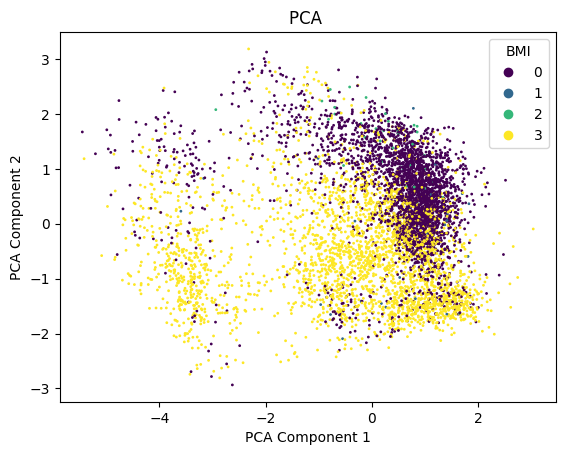

In [ ]:
label_encoder = LabelEncoder()
continent_labels = label_encoder.fit_transform(cyclists_df['BMI'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=continent_labels, s=1)
legend = plt.legend(*scatter.legend_elements(), title="BMI")

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA ')
plt.show()

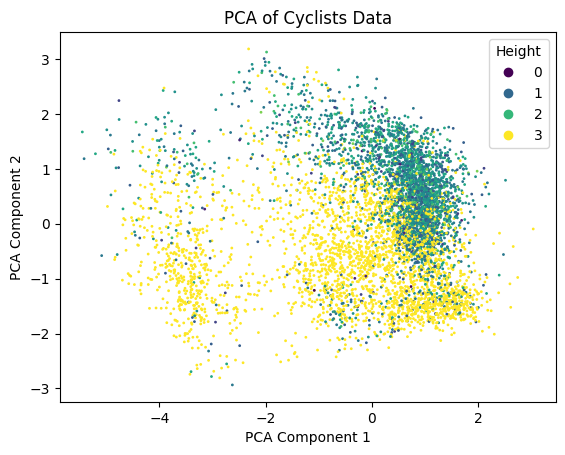

In [ ]:
label_encoder = LabelEncoder()
continent_labels = label_encoder.fit_transform(cyclists_df['categorical_height'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

scartter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=continent_labels, s=1)
legend = plt.legend(*scatter.legend_elements(), title="Height")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Cyclists Data')
plt.show()


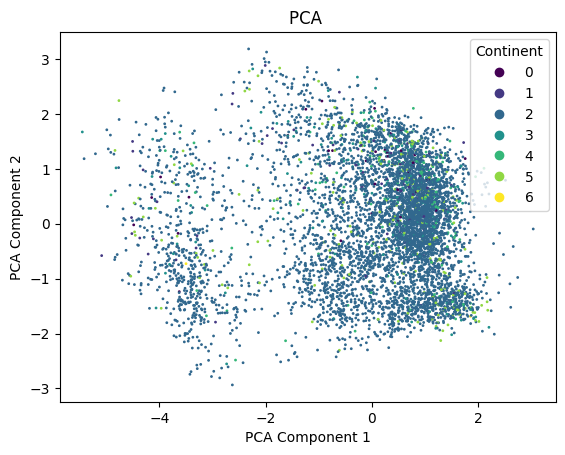

In [29]:

label_encoder = LabelEncoder()
continent_labels = label_encoder.fit_transform(cyclists_df['continent'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=continent_labels, s=1)
legend = plt.legend(*scatter.legend_elements(), title="Continent")

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA ')
plt.show()

Saving the normalized cyclists dataset (only with numerical columns).

In [33]:
normalized_df = pd.DataFrame(X, columns=cyclists_numerical_cols)
normalized_df.to_csv('../dataset/normalized_cyclists_dataset.csv', index=False)